In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import datasets,models,layers
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

In [3]:
# Loading the CIFAR10 dataset

data = tf.keras.datasets.cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Normalising the data

train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
# Defining my optimisers

optimisers = {
    'MB-GD': SGD(learning_rate=0.01),   # MB-GD using SGD optimizer (batch_size = 100)
    'AdaGrad': Adagrad(learning_rate=0.01,  epsilon=1e-8),
    'AdaDelta': Adadelta(learning_rate=0.01, rho=0.9, epsilon=1e-8),
    'RMSprop': RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-8),
    'Adam': Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)}

histories = {}

In [7]:
for name, opt in optimisers.items():

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy', # Minimising SCCE Loss Function
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=100)

    histories[name] = history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1383 - loss: 2.2870 - val_accuracy: 0.2268 - val_loss: 2.1330
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2557 - loss: 2.0667 - val_accuracy: 0.2716 - val_loss: 2.0075
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3165 - loss: 1.8980 - val_accuracy: 0.3544 - val_loss: 1.8080
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3747 - loss: 1.7660 - val_accuracy: 0.3949 - val_loss: 1.6794
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4016 - loss: 1.6792 - val_accuracy: 0.4074 - val_loss: 1.6475
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4256 - loss: 1.5900 - val_accuracy: 0.4116 - val_loss: 1.6320
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4521 - loss: 1.5214 - val_accuracy: 0.4724 - val_loss: 1.4700
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4735 - loss: 1.4718 - val_accuracy: 0

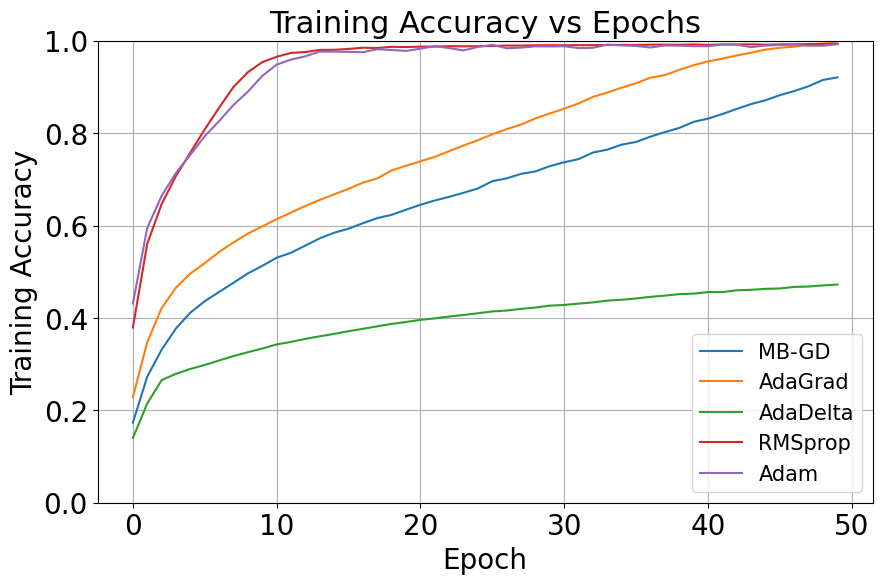

In [8]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name}')

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Training Accuracy', fontsize=20)
plt.title('Training Accuracy vs Epochs', fontsize=22)
plt.legend(fontsize=15)
plt.ylim([0, 1])
plt.grid(True)
plt.tick_params(axis='both', labelsize=20)
plt.show()

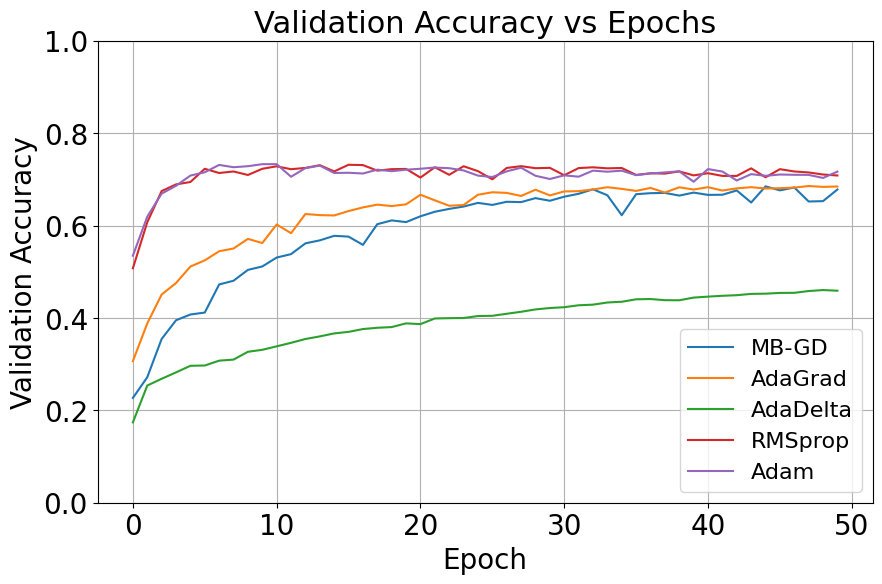

In [9]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Validation Accuracy', fontsize=20)
plt.title('Validation Accuracy vs Epochs', fontsize=22)
plt.legend(fontsize=16)
plt.ylim([0, 1])
plt.grid(True)
plt.tick_params(axis='both', labelsize=20)
plt.show()

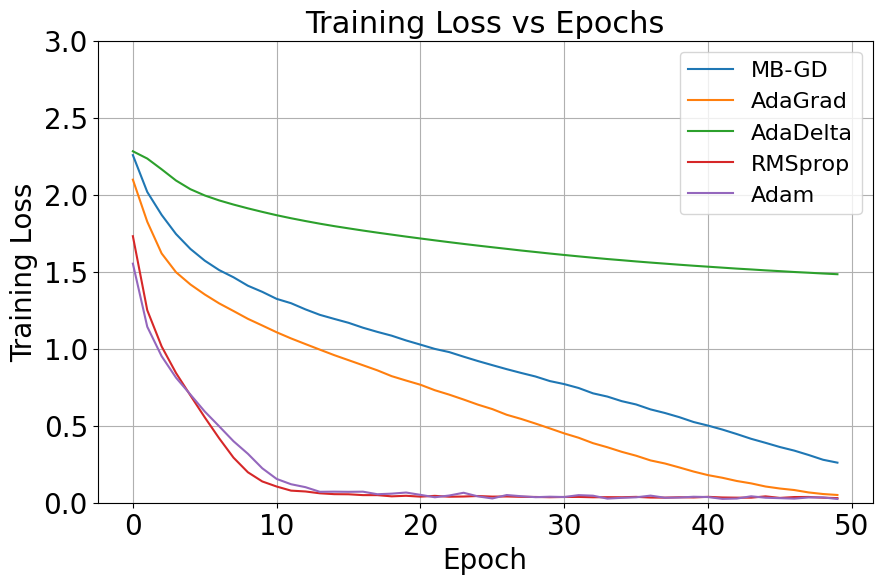

In [10]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name}')

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Training Loss', fontsize=20)
plt.title('Training Loss vs Epochs', fontsize=22)
plt.ylim([0, 3])
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=20)
plt.show()

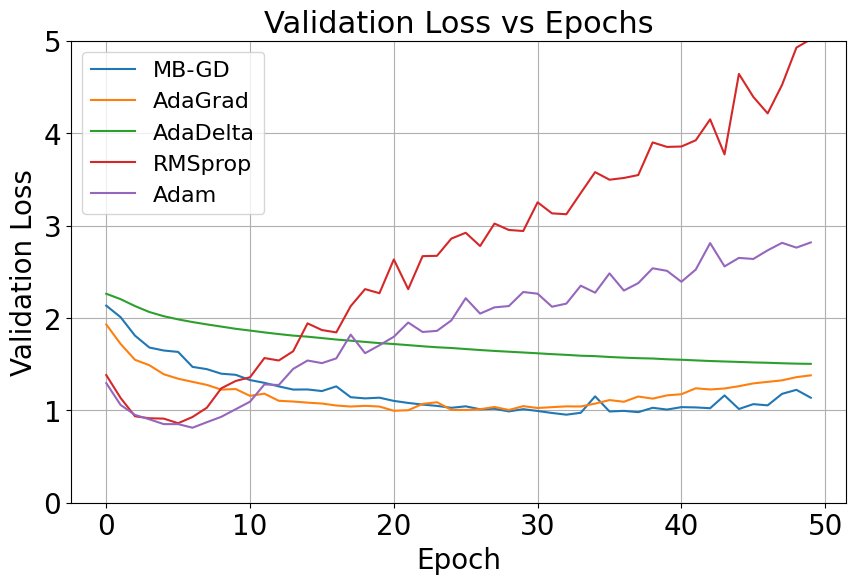

In [11]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name}')

plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.title('Validation Loss vs Epochs', fontsize=22)
plt.grid(True)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=20)
plt.ylim([0, 5])
plt.show()

Text(0, 0.5, 'Training Accuracy')

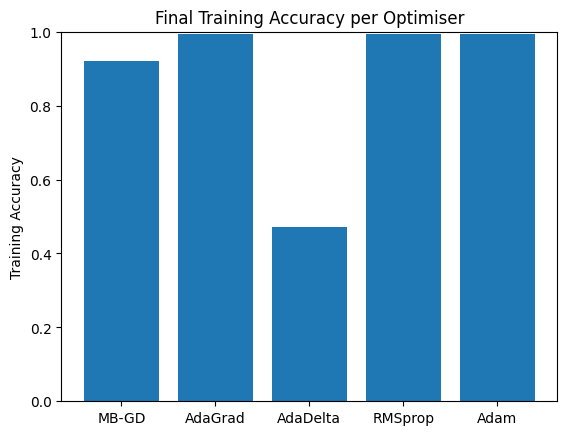

In [12]:
training_acc_bar = {name: max(history.history['accuracy']) for name, history in histories.items()}
plt.bar(training_acc_bar.keys(), training_acc_bar.values())
plt.title("Final Training Accuracy per Optimiser")
plt.ylim([0, 1])
plt.ylabel("Training Accuracy")

Text(0, 0.5, 'Validatioon Accuracy')

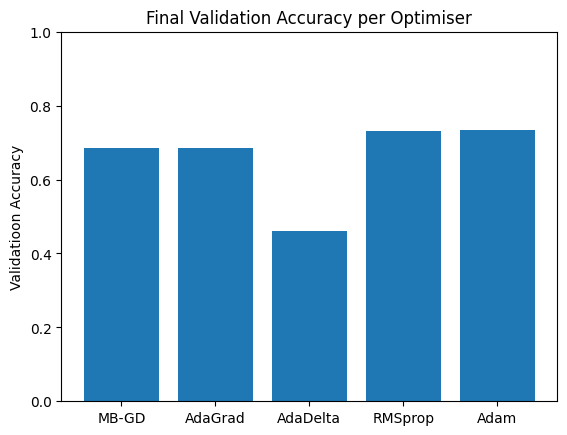

In [13]:
val_acc_bar = {name: max(history.history['val_accuracy']) for name, history in histories.items()}
plt.bar(val_acc_bar.keys(), val_acc_bar.values())
plt.title("Final Validation Accuracy per Optimiser")
plt.ylim([0, 1])
plt.ylabel("Validatioon Accuracy")

In [16]:
final_acc = {
    "Optimiser": [],
    "Final Training Accuracy": [],
    "Final Validation Accuracy": []}

for name, history in histories.items():
    final_acc["Optimiser"].append(name)
    final_acc["Final Training Accuracy"].append(history.history["accuracy"][-1])
    final_acc["Final Validation Accuracy"].append(history.history["val_accuracy"][-1])

df = pd.DataFrame(final_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Final Training Accuracy  Final Validation Accuracy
    MB-GD                   0.9207                     0.6780
  AdaGrad                   0.9949                     0.6845
 AdaDelta                   0.4723                     0.4589
  RMSprop                   0.9931                     0.7083
     Adam                   0.9924                     0.7167


In [19]:
final_loss = {
    "Optimiser": [],
    "Final Training Loss": [],
    "Final Validation Loss": []
}

for name, history in histories.items():
    final_loss["Optimiser"].append(name)
    final_loss["Final Training Loss"].append(history.history["loss"][-1])
    final_loss["Final Validation Loss"].append(history.history["val_loss"][-1])

df = pd.DataFrame(final_loss)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Final Training Loss  Final Validation Loss
    MB-GD               0.2602                 1.1365
  AdaGrad               0.0503                 1.3787
 AdaDelta               1.4838                 1.5029
  RMSprop               0.0300                 5.0162
     Adam               0.0245                 2.8170


In [17]:
best_train_acc = {"Optimiser": [], "Best Training Accuracy": []}
for name, history in histories.items():
    best_train_acc["Optimiser"].append(name)
    best_train_acc["Best Training Accuracy"].append(max(history.history["accuracy"]))

df = pd.DataFrame(best_train_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Best Training Accuracy
    MB-GD                  0.9207
  AdaGrad                  0.9949
 AdaDelta                  0.4723
  RMSprop                  0.9931
     Adam                  0.9924


In [18]:
best_val_acc = {"Optimiser": [], "Best Validation Accuracy": []}
for name, history in histories.items():
    best_val_acc["Optimiser"].append(name)
    best_val_acc["Best Validation Accuracy"].append(max(history.history["val_accuracy"]))

df = pd.DataFrame(best_val_acc)
print(df.to_string(index=False, float_format="{:.4f}".format))

Optimiser  Best Validation Accuracy
    MB-GD                    0.6848
  AdaGrad                    0.6855
 AdaDelta                    0.4603
  RMSprop                    0.7315
     Adam                    0.7328
